# 📝 Exercise M6.02

The aim of this exercise it to explore some attributes available in
scikit-learn random forest.

First, we will fit the penguins regression dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_names = ["Flipper Length (mm)"]
target_name = "Body Mass (g)"
data, target = penguins[feature_names], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a random forest containing three trees. Train the forest and
check the statistical performance on the testing set in terms of mean
absolute error.

In [76]:
# Write your code here.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor()
model.get_params()
model = RandomForestRegressor(n_estimators = 3)
model.fit(data_train, target_train)
target_pred = model.predict(data_test)
mae1 = mean_absolute_error(target_pred, target_test)
mae2 = mean_absolute_error(target_test, target_pred)
print(mae1, mae2)

343.17123512254324 343.17123512254324


The next steps of this exercise are to:

- create a new dataset containing the penguins with a flipper length
  between 170 mm and 230 mm;
- plot the training data using a scatter plot;
- plot the decision of each individual tree by predicting on the newly
  created dataset;
- plot the decision of the random forest using this newly created dataset.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">The trees contained in the forest that you created can be accessed
with the attribute <tt class="docutils literal">estimators_</tt>.</p>
</div>

In [77]:
# Write your code here.
import seaborn as sns
#data[data["Flipper Length (mm)"] >= 170 and data["Flipper Length (mm)"] <= 230]
#data[data["Flipper Length (mm)"] >= 170 and data["Flipper Length (mm)"] <= 230]
#data[data["Flipper Length (mm)"] >= 170 and data["Flipper Length (mm)"] <= 230]
penguins2 = penguins[(penguins["Flipper Length (mm)"] >= 170) & (penguins["Flipper Length (mm)"] <= 230)].sort_values("Flipper Length (mm)")
print(penguins2.head())
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data2 = penguins2[[feature_name]]
target2 = penguins2[target_name] # Avec les double crochets, on a un DF
target2

     Flipper Length (mm)  Body Mass (g)
27                 172.0         3150.0
19                 174.0         3400.0
121                176.0         3450.0
29                 178.0         3250.0
30                 178.0         3900.0


27     3150.0
19     3400.0
121    3450.0
29     3250.0
30     3900.0
        ...  
264    5500.0
266    5850.0
184    6050.0
240    5550.0
216    5700.0
Name: Body Mass (g), Length: 341, dtype: float64

0
1
2


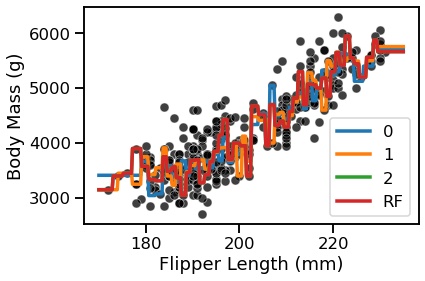

In [104]:
import numpy as np
from matplotlib import pyplot as plt

data_ranges = pd.DataFrame(np.linspace(170, 235, num=300),
                           columns=data.columns)

for i, tree in enumerate(model.estimators_):
    print(i)
    predictions = tree.predict(data_ranges)
    plt.plot(data_ranges, predictions, label = i)
    
predictions_rf = model.predict(data_ranges)
plt.plot(data_ranges, predictions, label = "RF", color="tab:red")

sns.scatterplot(data=penguins, x=feature_names[0], y=target_name,
                color="black", alpha=0.5)

_ = plt.legend()

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

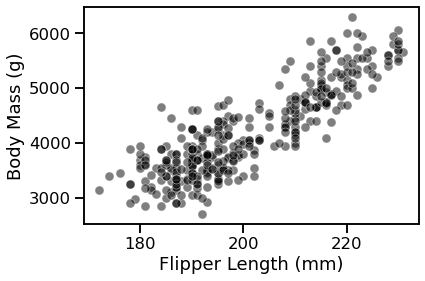

In [105]:
# Pour le scatterplot, on peut aussi utiliser sans utiliser argument data
sns.scatterplot(x=penguins[feature_name], y=penguins[target_name],
                color="black", alpha=0.5)